In [329]:
import pandas as pd
import os
import json

class Const:
    OCR = 'ocr'
    GROUND = 'groundtruth'
    REGION = 'region'
    LINE = 'line'
    SENTENCE = 'sentence'
    FILE = 'filename'
    DATASET = 'dataset_name'
    PREDICTION = 'prediction'
    PROMPT = 'prompt'
    LANGUAGE = 'language'
    NONE = None


In [330]:
datasets = []

for root, dirs, files in os.walk('../data/datasets/ocr/converted'):
    for file in files:
        if file.endswith(".jsonl"):
            input_file = os.path.join(root, file)
            print(input_file)
            with open(input_file) as f:
                lines = f.read().splitlines()
            df_inter = pd.DataFrame(lines)
            df_inter.columns = ['json_element']
            df_inter['json_element'].apply(json.loads)
            df = pd.json_normalize(df_inter['json_element'].apply(json.loads))
            datasets.append(df)

../data/datasets/ocr/converted/ajmc_mixed.jsonl
../data/datasets/ocr/converted/ajmc_primary_text.jsonl
../data/datasets/ocr/converted/icdar-2017.jsonl
../data/datasets/ocr/converted/overproof.jsonl
../data/datasets/ocr/converted/icdar-2019.jsonl
../data/datasets/ocr/converted/impresso-nzz.jsonl
../data/datasets/ocr/converted/sample/sample.jsonl


In [331]:
print('Number of unique lines/sentences/regions.\n')
for dataset in datasets:
    print('Dataset:', dataset['dataset_name'].unique()[0])
    print('No. lines:', dataset['ocr.line']. nunique(), '/', len(dataset['ocr.sentence']), 
          'No. sentences:', dataset['ocr.sentence']. nunique(), '/', len(dataset['ocr.sentence']), 
          'No. regions:', dataset['ocr.region']. nunique(), '/', len(dataset['ocr.region']))
    print('-'*80)

Number of unique lines/sentences/regions.

Dataset: ajmc
No. lines: 870 / 2131 No. sentences: 679 / 2131 No. regions: 63 / 2131
--------------------------------------------------------------------------------
Dataset: ajmc
No. lines: 151 / 330 No. sentences: 112 / 330 No. regions: 33 / 330
--------------------------------------------------------------------------------
Dataset: icdar-2017
No. lines: 0 / 477 No. sentences: 461 / 477 No. regions: 28 / 477
--------------------------------------------------------------------------------
Dataset: overproof
No. lines: 2278 / 2669 No. sentences: 399 / 2669 No. regions: 41 / 2669
--------------------------------------------------------------------------------
Dataset: icdar-2019
No. lines: 0 / 404 No. sentences: 404 / 404 No. regions: 41 / 404
--------------------------------------------------------------------------------
Dataset: impresso-nzz
No. lines: 3709 / 6140 No. sentences: 1943 / 6140 No. regions: 635 / 6140
--------------------------

In [332]:
datasets[0].head()

,filename,dataset_name,ocr.line,ocr.sentence,ocr.region,groundtruth.line,groundtruth.sentence,groundtruth.region
0,bsb10234118,ajmc,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm.,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm.,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...
1,bsb10234118,ajmc,I. T. XVI. p. 731. et 718. eamque κακόζηλον ἑρ...,p. 731.,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...,1. T. XVI. p. 731. et 718. eamque κακόζηλον ἑρ...,p. 731.,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...
2,bsb10234118,ajmc,V. 9. Ἔνδον γὰρ ἀνήρ - Olim adnotavi articulum...,V. 9.,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...,"V. 9. ""Evdov γὰρ ‘arıjg — Olim adnotavi articu...",V. 9.,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...
3,bsb10234118,ajmc,δατος Aristoph. Lys. 370. αἱρώμεθ’ ὑμεῖς θοὔδ...,Lys.,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...,durog Aristoph. Lys. 370. αἱρώμεθ’ ὑμεῖς θοὔδα...,Lys.,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...
4,bsb10234118,ajmc,xerit Sophocles χθονὸς ἀείρας et Oppian. Cyn. ...,Cyn.,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. II. in...,xerit Sophocles χθονὸς deigag et Oppian. Cyn. ...,Cyn.,ἀπ’ ἐκείνων ἐπὶ τὰ πάθη μετάβασις Comm. III. i...


In [333]:
GENERATE_SAMPLE = False

In [334]:
dataset = pd.concat(datasets)

In [335]:
len(dataset)

13366

In [336]:
dataset.columns

Index(['filename', 'dataset_name', 'ocr.line', 'ocr.sentence', 'ocr.region',
       'groundtruth.line', 'groundtruth.sentence', 'groundtruth.region',
       'language', 'File', 'Date', 'Type', 'NbAlignedChar', 'article_id'],
      dtype='object')

In [337]:
if GENERATE_SAMPLE:
    from sklearn.model_selection import train_test_split

    files_keep, files_removed, _, _ = train_test_split(dataset, dataset['dataset_name'], 
                                                       test_size=0.90, random_state=42)

In [338]:
len(files_keep)

1215

In [339]:
if GENERATE_SAMPLE:
    output_file = '../data/datasets/ocr/converted/sample/sample.jsonl'
    with open(output_file, "w") as outfile:
        for index, row in files_keep.iterrows():

            json_line = json.dumps({Const.LANGUAGE: row['language'],
                                    Const.FILE: row['filename'],
                                    Const.DATASET: row['dataset_name'],
                                    Const.OCR: {Const.LINE: row['ocr.line'],
                                                Const.SENTENCE: row['ocr.sentence'],
                                                Const.REGION: row['ocr.region']}, 
                                    Const.GROUND: {Const.LINE: row['groundtruth.line'],
                                                   Const.SENTENCE: row['groundtruth.sentence'],
                                                   Const.REGION: row['groundtruth.region']},
                                    'File': row['File'], 
                                    'Date': row['Date'],
                                    'Type': row['Type'], 
                                    'NbAlignedChar': row['NbAlignedChar'], 
                                    'article_id': row['article_id']
                                    })

            outfile.write(json_line + "\n")
            outfile.flush()

### Analsys of preliminary results

In [382]:
results = []

for root, dirs, files in os.walk('../data/output'):
    for file in files:
        if file.endswith(".jsonl"):
            input_file = os.path.join(root, file)
            print(input_file)
            with open(input_file) as f:
                lines = f.read().splitlines()
            df_inter = pd.DataFrame(lines)
            df_inter.columns = ['json_element']
            df_inter['json_element'].apply(json.loads)
            df = pd.json_normalize(df_inter['json_element'].apply(json.loads))
            results.append(df)
            

../data/output/prompt_basic_01/sample/results-sample-facebook-opt-350m.jsonl
../data/output/prompt_basic_01/sample/results-sample-gpt2.jsonl


In [341]:
results[0].columns

Index(['language', 'filename', 'dataset_name', 'File', 'Date', 'Type',
       'NbAlignedChar', 'article_id', 'ocr.line', 'ocr.sentence', 'ocr.region',
       'groundtruth.line', 'groundtruth.sentence', 'groundtruth.region',
       'prediction.prompt', 'prediction.line', 'prediction.sentence',
       'prediction.region'],
      dtype='object')

In [342]:
from Levenshtein import distance

def levenshtein(reference, hypothesis, progress_bar=False):
    print(reference, hypothesis)
    
    assert len(reference) == len(hypothesis)
    text = zip(reference, hypothesis)
    if progress_bar:
        text = tqdm(text, total=len(reference))
    d = [distance(r, h) for r, h in text]
    output = pd.DataFrame({"reference": reference, "hypothesis": hypothesis})\
        .assign(distance=lambda df: d)\
        .assign(
        cer=lambda df: df.apply(
            lambda r: 100 * r["distance"] / max(len(r["reference"]), 1),
            axis=1
        )
    )
    return output

In [343]:
levenshtein("ve>nachlässig'c» Slilrichtung wieder gebührende Beach".split(), 
            "ve>nachlässig'c» Slilrichtung wieder gebührende Beach".split(), progress_bar=False)

["ve>nachlässig'c»", 'Slilrichtung', 'wieder', 'gebührende', 'Beach'] ["ve>nachlässig'c»", 'Slilrichtung', 'wieder', 'gebührende', 'Beach']


,reference,hypothesis,distance,cer
0,ve>nachlässig'c»,ve>nachlässig'c»,0,0.0
1,Slilrichtung,Slilrichtung,0,0.0
2,wieder,wieder,0,0.0
3,gebührende,gebührende,0,0.0
4,Beach,Beach,0,0.0


In [344]:
result.isnull().values.any()

False

In [357]:
import Levenshtein


def compute_levenshtein_distance(text1, text2):
#     print(text1, text2)
    if ('No text' in text1) or 'No text' in text2:
        return -150
    return Levenshtein.distance(text1, text2)

def compute_normalized_levenshtein_distance(text1, text2):
    distance = Levenshtein.distance(text1, text2)
    max_length = max(len(text1), len(text2))
    normalized_distance = distance / max_length
    return normalized_distance


def evaluate_ocr(original_ocr_text, corrected_ocr_text, ground_truth_text):
    original_distance = compute_levenshtein_distance(original_ocr_text, ground_truth_text)
    corrected_distance = compute_levenshtein_distance(corrected_ocr_text, ground_truth_text)
    return original_distance, corrected_distance


def get_improvement(original_distance, corrected_distance):
    return original_distance - corrected_distance


In [384]:
# Define a function to compute the OCR noise level
def compute_ocr_noise_level(ground_truth, ocr_text):
#     print('ground_truth', ground_truth, len(ground_truth))
    levenshtein_dist = Levenshtein.distance(ground_truth, ocr_text)
    return levenshtein_dist / len(ground_truth)

In [ ]:
for idx, result in enumerate(results):
    
    results[idx] = results[idx].fillna('No text')
    
    
    for segment_type in ['line', 'sentence', 'region']:
        
        results[idx]['length'] = results[idx][f'groundtruth.{segment_type}'].str.len()
        results[idx] = results[idx][results[idx]['length'] > 3]
        #results[idx].dropna(subset=[f'groundtruth.{segment_type}'], inplace=True)
        
        results[idx][f'{segment_type}-ocr-level'] = \
            results[idx].apply(lambda x: compute_ocr_noise_level(x[f'groundtruth.{segment_type}'],
                                                                 x[f'ocr.{segment_type}']), axis=1)
        
        results[idx][f'{segment_type}-ground-ocr'] = \
            results[idx].apply(lambda x: compute_levenshtein_distance(x[f'groundtruth.{segment_type}'],
                                                                      x[f'ocr.{segment_type}']), axis=1)
        results[idx][f'{segment_type}-ground-pred'] = \
            results[idx].apply(lambda x: compute_levenshtein_distance(x[f'groundtruth.{segment_type}'],
                                                                      x[f'prediction.{segment_type}']), axis=1)

        results[idx][f'{segment_type}-improvement'] = \
            results[idx].apply(lambda x: get_improvement(x[f'{segment_type}-ground-ocr'],
                                                         x[f'{segment_type}-ground-pred']), axis=1)
        

In [362]:
for idx, result in enumerate(results):
    for segment_type in ['line', 'sentence', 'region']:
        improved_texts = result[result[f'{segment_type}-improvement'] >= 0.0]
        for _, improved_text in improved_texts.iterrows():
            print('Improvement:', improved_text[f'{segment_type}-improvement'])
            print(improved_text[f'groundtruth.{segment_type}'][:50])
            print(improved_text[f'ocr.{segment_type}'][:50])
            print(improved_text[f'prediction.{segment_type}'][:50])
            print('--'*50)

Improvement: 0
No text
No text
No text
----------------------------------------------------------------------------------------------------
Improvement: 0
No text
No text
No text
----------------------------------------------------------------------------------------------------
Improvement: 0
No text
No text
No text
----------------------------------------------------------------------------------------------------
Improvement: 0
No text
No text
No text
----------------------------------------------------------------------------------------------------
Improvement: 0
No text
No text
No text
----------------------------------------------------------------------------------------------------
Improvement: 0
No text
No text
No text
----------------------------------------------------------------------------------------------------
Improvement: 0
No text
No text
No text
----------------------------------------------------------------------------------------------------
Improvement: 0
No te

GOVERNMENT GAZETTE. The following announcements ap
GOVERNMENT GAZETTE. The following announcements ap
No text
----------------------------------------------------------------------------------------------------
Improvement: 201
"EQUALISING MISERY" ' Mr. Churchill said that i Pa
"EMBALMING MISERY" ' Mr. Churchill said that Parli
No text
----------------------------------------------------------------------------------------------------
Improvement: 163
aus England zuständigen englischen Kriegsministeri
aus England zuständigen englischen Kriegsministeri
No text
----------------------------------------------------------------------------------------------------
Improvement: 150
Mit seiner Frau lebte er über die Maßen glücklich.
Mit seiner Frau lebte er über die Maßen glücklich.
No text
----------------------------------------------------------------------------------------------------
Improvement: 204
ἐκτὸς ὄντα πημάτων τὰ δείνʼ ὁρᾶν : O. T. 503, πρὶν
ἐκτὸς Gora πημάτων τὰ δείν’ opã: O. T

In [363]:
results[0].head()

,language,filename,dataset_name,File,Date,Type,NbAlignedChar,article_id,ocr.line,ocr.sentence,...,prediction.region,line-ground-ocr,line-ground-pred,line-improvement,sentence-ground-ocr,sentence-ground-pred,sentence-improvement,region-ground-ocr,region-ground-pred,region-improvement
0,No text,../../data/datasets/ocr/original/impresso-nzz/...,impresso-nzz,No text,No text,No text,No text,No text,"lich den Mobilistrungöbeschluß, der unS an daS...","Letzterer Vergleich kommt nicht von unS, darf ...",...,No text,6,54,-48,8,-150,158,31,-150,181
1,No text,../../data/datasets/ocr/original/impresso-nzz/...,impresso-nzz,No text,No text,No text,No text,No text,"lich den Mobilistrungöbeschluß, der unS an daS...","Letzterer Vergleich kommt nicht von unS, darf ...",...,No text,6,54,-48,8,193,-185,31,-150,181
2,No text,../../data/datasets/ocr/original/impresso-nzz/...,impresso-nzz,No text,No text,No text,No text,No text,"lich den Mobilistrungöbeschluß, der unS an daS...","Letzterer Vergleich kommt nicht von unS, darf ...",...,"</s>Correct the text: ""Letzterer Vergleich kom...",6,54,-48,8,193,-185,31,1204,-1173
3,No text,../../data/datasets/ocr/original/overproof/dat...,overproof,No text,No text,No text,No text,14691000 year 1905 type Article title The Sydn...,"Charles Sibley, assault and robbery , W llliam...","stealing in a dwelling, william Downs, stealin...",...,No text,4,121,-117,86,-150,236,402,-150,552
4,No text,../../data/datasets/ocr/original/overproof/dat...,overproof,No text,No text,No text,No text,14691000 year 1905 type Article title The Sydn...,"Charles Sibley, assault and robbery , W llliam...","stealing in a dwelling, william Downs, stealin...",...,No text,4,121,-117,86,942,-856,402,-150,552


<Figure size 1200x600 with 0 Axes>

/Users/eboros/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11799 (\N{DOUBLE OBLIQUE HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


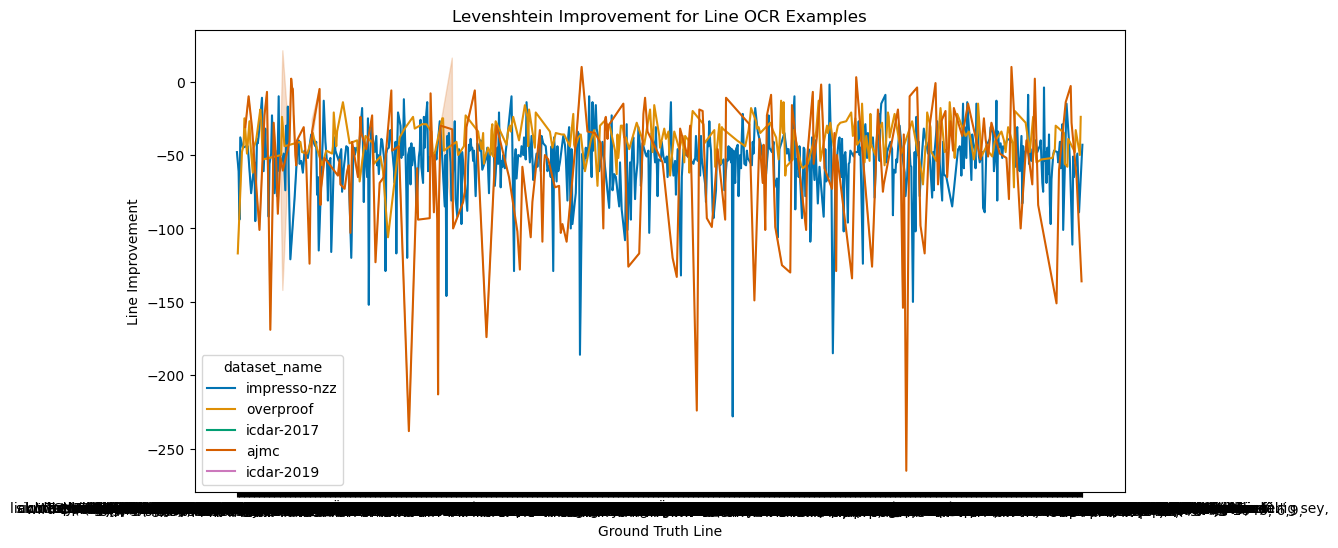

/Users/eboros/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11799 (\N{DOUBLE OBLIQUE HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


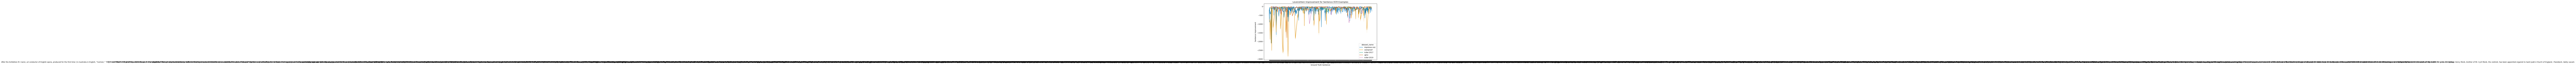

/Users/eboros/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 42843 (\N{LATIN SMALL LETTER R ROTUNDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eboros/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 42864 (\N{MODIFIER LETTER US}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eboros/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7633 (\N{COMBINING UR ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eboros/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7651 (\N{COMBINING LATIN SMALL LETTER R ROTUNDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eboros/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11799 (\N{DOUBLE OBLIQUE HYPHEN}) mis

RuntimeError: In draw_glyphs_to_bitmap: Could not convert glyph to bitmap (raster overflow; error code 0x62)

<Figure size 1200x600 with 1 Axes>

/Users/eboros/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11799 (\N{DOUBLE OBLIQUE HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


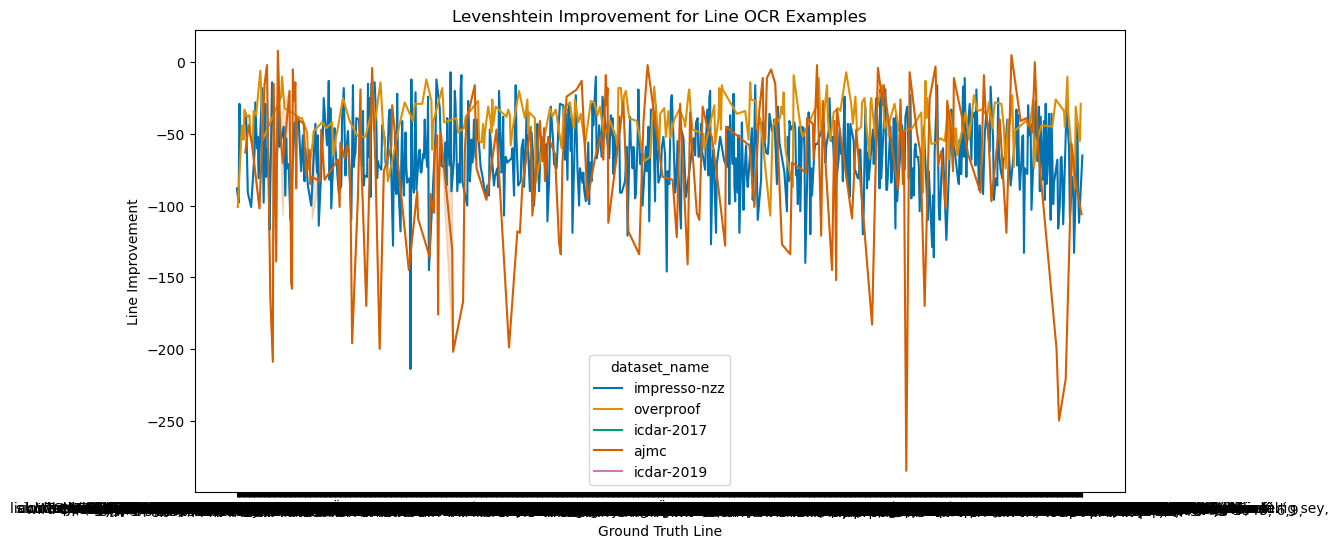

/Users/eboros/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11799 (\N{DOUBLE OBLIQUE HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


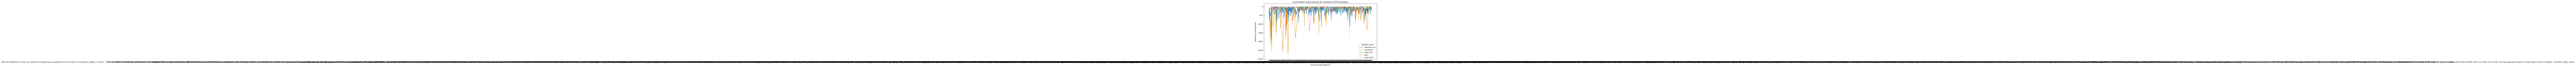

/Users/eboros/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 42843 (\N{LATIN SMALL LETTER R ROTUNDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eboros/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 42864 (\N{MODIFIER LETTER US}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eboros/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7633 (\N{COMBINING UR ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eboros/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7651 (\N{COMBINING LATIN SMALL LETTER R ROTUNDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eboros/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11799 (\N{DOUBLE OBLIQUE HYPHEN}) mis

RuntimeError: In draw_glyphs_to_bitmap: Could not convert glyph to bitmap (raster overflow; error code 0x62)

<Figure size 1200x600 with 1 Axes>

In [351]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the colorblind color palette
sns.set_palette("colorblind")
plt.figure(figsize=(12, 6))

for result in results:
    
    for segment_type in ['line', 'sentence', 'region']:
        
        # Create the line plot
        fig, ax = plt.subplots(figsize=(12, 6))
        
        sns.lineplot(x=f"groundtruth.{segment_type}", y=f"{segment_type}-improvement", hue='dataset_name',
                    data=result, ax=ax)

        # Set plot labels
        ax.set_xlabel(f"Ground Truth {segment_type.capitalize()}")
        ax.set_ylabel(f"{segment_type.capitalize()} Improvement")
        ax.set_title(f"Levenshtein Improvement for {segment_type.capitalize()} OCR Examples")


        # Show the plot
        plt.show()


In [ ]:
from genalog.text import anchor

def align_texts(gt_text, ocr_text):

    # We align the texts with RETAS Method
    try:
        aligned_gt, aligned_noise = anchor.align_w_anchor(gt_text, ocr_text)
    except:
        aligned_gt, aligned_noise = gt_text, ocr_text
    
#     print('GT:', gt_text)
#     print('OCR:', ocr_text)
#     print('--'*100)
    return aligned_gt, aligned_noise

In [ ]:
for idx, result in enumerate(results):
    
    results[idx] = results[idx].fillna('No text')
    
    def replace(x):
        if len(x.strip()) == 0:
            return 'No text'
        return x
    
    for column in results[idx].columns:
        results[idx][column] = results[idx][column].apply(lambda x: replace(x))
        
    #results[idx][['groundtruth.line', 'ocr.line']] = results[idx].apply(lambda x: align_texts(x['groundtruth.line'], 
    #                                                                                        x['ocr.line']), axis=1)
    print('--'*40, idx)
    print(results[idx][['groundtruth.line', 'prediction.line']])
    results[idx][['groundtruth.line', 'prediction.line']] = results[idx].apply(lambda x: align_texts(x['groundtruth.line'], 
                                                                                                     x['prediction.line']), axis=1)
    
#     x = results[idx].apply(lambda x: levenshtein(x['groundtruth.line'].split(), 
#                                                             x['ocr.line'].split()), axis=1)
#     x = results[idx].apply(lambda x: levenshtein(x['groundtruth.sentence'].split(), 
#                                                                 x['ocr.sentence'].split()), axis=1)
#     x = results[idx].apply(lambda x: levenshtein(x['groundtruth.region'].split(), 
#                                                               x['ocr.region'].split()), axis=1)
    #print(x)
    

In [ ]:
results[0]

In [ ]:
idx = 9

In [ ]:
df.iloc[idx]['ocr.line']

In [ ]:
df.iloc[idx]['ocr.sentence']

In [ ]:
df.iloc[idx]['ocr.region']

In [ ]:
df.columns

In [ ]:
# ht_raw = " ".join(df['ocr.sentence'].to_list())
# print(f"{len(set(ht_raw.lower()))} characters in human transcription")
# print(f"The following characters have not been system-transcribed: \n{set(ht_raw.lower())-set(st_raw.lower())}")
tokens = ht_raw.split()
WORDS = set(tokens)

In [ ]:
def eddi(input_text, reference_words=WORDS, ed_threshold=25, max_unk_tokens=3):
    """ Baseline I: Edit distance -based Baseline
    An edit distance-based baseline: Given a list of valid (reference) words,
    this baseline (called eddi) detects words not in the reference list and 
    changes them to the closest one in the reference list.
    :param input_text: the source text
    :param reference_words: a list of valid words (e.g., computed from the target data) 
    :param ed_threshold: the edit distance threshold below from which a word is replaced
    :param max_unk_tokens: the max number of unknown tokens in the transcribed text 
    :return: the new text
    """
    tokens = input_text.split()
    # Unknown transcribed tokens; proceed only if few
    unknowns = [i for i, w in enumerate(tokens) if w not in reference_words]
    if len(unknowns) > max_unk_tokens:
        return " ".join(tokens)

    for ind in unknowns:
        # Replace each uknown token with the ground truth token w/min edit distance 
        word = tokens[ind]
        min_cer, new_word = 100, word
        for ref in reference_words:
            candidate_min_cer = pywer.cer([ref], [word])
            if candidate_min_cer < min_cer:
                min_cer = candidate_min_cer
                if min_cer < ed_threshold:
                    new_word = ref
    tokens[ind] = new_word
    
    return " ".join(tokens)